<a href="https://colab.research.google.com/github/rams30/ASAP_CPP_project/blob/main/Autonomous_Driving_SystemSS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np

In [ ]:
def de_normalize(num):
  return (num * 255).astype(np.uint8)

In [ ]:
def de_normalize(num):
  return (num * 255).astype(np.uint8)

In [ ]:
# Load the data
data = np.load('/content/gdrive/MyDrive/Dataset numpy array(converted)/rawTrainMask.npy')

# Process the data
processed_data = de_normalize(data)

# Save the processed data to a temporary file in Colab's local storage
temp_file_path = '/content/temp_rawTrainMask.npy' # Using Colab's local storage
np.save(temp_file_path, processed_data)

# Move (or copy) the temporary file to your Google Drive
!cp "{temp_file_path}" "/content/gdrive/MyDrive/Dataset numpy array(converted)/rawTrainMask.npy"
# Or use !mv if you want to move instead of copy

print("File saved successfully!")

File saved successfully!


In [ ]:
print(np.load('/content/gdrive/MyDrive/Dataset numpy array(converted)/rawTrainMask.npy'))

[[[[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [ 35  65  90]
   [ 70 130 180]
   ...
   [107 142  35]
   [107 142  35]
   [  0   0   0]]

  [[  0   0   0]
   [ 35  65  90]
   [ 70 130 180]
   ...
   [107 142  35]
   [107 142  35]
   [  0   0   0]]

  ...

  [[  0   0   0]
   [ 64  32  64]
   [128  64 128]
   ...
   [128  64 128]
   [128  64 128]
   [  0   0   0]]

  [[  0   0   0]
   [ 64  32  64]
   [128  64 128]
   ...
   [128  64 128]
   [128  64 128]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]]


 [[[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [ 54  71  18]
   [107 142  35]
   ...
   [ 70  70  70]
   [ 70  70  70]
   [  0   0   0]]

  [[  0   0   0]
   [ 54  71  18]
   [107 142  35]
   ...
   [ 70  70  70]
   [ 70  70  70]
   [  0   0

In [ ]:
print(np.load('/content/gdrive/My Drive/Dataset numpy array(converted)/rawTrainMask.npy').dtype)

uint8


In [ ]:
print(np.load('/content/gdrive/My Drive/Dataset numpy array(converted)/rawTrainMask.npy').shape)

(1046, 256, 512, 3)


In [ ]:
color_to_class_mapping = {
    (0, 0, 0): 0,
    (0, 0, 142): 1,
    (70, 70, 70): 2,
    (70, 130, 180): 3,
    (107, 142, 35): 4,
    (119, 11, 32): 5,
    (128, 64, 128): 6,
    (152, 251, 152): 7,
    (153, 153, 153): 8,
    (220, 20, 60): 9,
    (220, 220, 0): 10,
    (244, 35, 232): 11,
    (255, 0, 0): 12
}

def rgb_to_class_index(rgb_mask, color_to_class_mapping):
    class_indexed_mask = np.zeros((rgb_mask.shape[0], rgb_mask.shape[1]), dtype=np.int32)

    for rgb_color, class_idx in color_to_class_mapping.items():
        match = np.all(rgb_mask == rgb_color, axis=-1)
        class_indexed_mask[match] = class_idx
    return class_indexed_mask.astype(np.uint8)

In [ ]:
rawTrainMaskClass_labelled = []
for i in np.load('/content/gdrive/My Drive/Dataset numpy array(converted)/rawTrainMask.npy'):
  rawTrainMaskClass_labelled.append(rgb_to_class_index(i, color_to_class_mapping))

In [ ]:
np.save('/content/gdrive/MyDrive/Dataset numpy array(converted)/rawTrainMaskClass_labelled.npy', rawTrainMaskClass_labelled)

In [ ]:
print(np.load('/content/gdrive/My Drive/Dataset numpy array(converted)/rawTrainMaskClass_labelled.npy').shape)

(1046, 256, 512)


In [ ]:
dir = '/content/gdrive/My Drive'
dir_2 = '/content/gdrive/My Drive/Dataset numpy array(converted)'

In [ ]:
import os
import cv2
import random
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt

In [ ]:
def resize_image(image_array, size=(512, 256)):
    image = cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB)
    return cv2.resize(image, size, interpolation=cv2.INTER_NEAREST)

def normalize_image(image):
    return image / 255.0

In [ ]:

inputs = tf.keras.layers.Input((256, 512, 3))

c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2,2))(c2)

c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2,2))(c3)

c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D((2,2))(c4)

c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)


u6 = tf.keras.layers.Conv2DTranspose(128, (3, 3), strides = (2, 2), padding = 'same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

u7 = tf.keras.layers.Conv2DTranspose(64, (3, 3), strides = (2, 2), padding = 'same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

u8 = tf.keras.layers.Conv2DTranspose(32, (3, 3), strides = (2, 2), padding = 'same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

u9 = tf.keras.layers.Conv2DTranspose(16, (3, 3), strides = (2, 2), padding = 'same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1])
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

output = tf.keras.layers.Conv2D(13, (1, 1), activation = 'sigmoid')(c9)
model = tf.keras.Model(inputs = [inputs], outputs = [output])


model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'] )
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 512, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 512, 16)         448       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 256, 512, 16)         0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 512, 16)         2320      ['dropout[0][0]']             
                                                                                              

In [ ]:

os.makedirs(dir, exist_ok=True)
os.makedirs(os.path.join(dir, 'model_for_SS_CP.keras'), exist_ok=True)  # Model checkpoint directory
os.makedirs(os.path.join(dir, 'logs'), exist_ok=True)  # Logs directory

In [ ]:
checkpointer = tf.keras.callbacks.ModelCheckpoint(dir + '/model_for_SS_CP.keras', verbose=1, save_best_only=True)

callbacks = [
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=6),
        tf.keras.callbacks.TensorBoard(log_dir=dir + '/logs')
        ]

In [ ]:
rawTrain = np.load(dir_2 + '/rawTrain.npy')
rawTrainMask = np.load(dir_2 + '/rawTrainMask.npy')

In [ ]:

results = model.fit(np.load(dir_2 + '/rawTrain.npy')[:270], np.load(dir_2 + '/rawTrainMaskClass_labelled.npy')[:270], validation_split=0.09, batch_size=16, epochs=40, callbacks=callbacks)

Epoch 1/40
16/16 [==============================] - 58s 3s/step - loss: 2.2975 - accuracy: 0.2444 - val_loss: 2.0876 - val_accuracy: 0.1384
Epoch 2/40
16/16 [==============================] - 53s 3s/step - loss: 2.0281 - accuracy: 0.2928 - val_loss: 1.9444 - val_accuracy: 0.3511
Epoch 3/40
16/16 [==============================] - 53s 3s/step - loss: 1.8782 - accuracy: 0.3213 - val_loss: 1.8191 - val_accuracy: 0.3654
Epoch 4/40
16/16 [==============================] - 52s 3s/step - loss: 1.7829 - accuracy: 0.3588 - val_loss: 1.7316 - val_accuracy: 0.3960
Epoch 5/40
16/16 [==============================] - 53s 3s/step - loss: 1.6715 - accuracy: 0.4093 - val_loss: 1.5956 - val_accuracy: 0.4491
Epoch 6/40
16/16 [==============================] - 52s 3s/step - loss: 1.5433 - accuracy: 0.4694 - val_loss: 1.5063 - val_accuracy: 0.4808
Epoch 7/40
16/16 [==============================] - 52s 3s/step - loss: 1.4279 - accuracy: 0.5423 - val_loss: 1.3680 - val_accuracy: 0.5105
Epoch 8/40
16/16 [==

In [ ]:

results = model.fit(np.load(dir_2 + '/rawTrain.npy')[:270], np.load(dir_2 + '/rawTrainMaskClass_labelled.npy')[:270], validation_split=0.09, batch_size=16, epochs=10, callbacks=callbacks)

Epoch 1/10
16/16 [==============================] - 55s 3s/step - loss: 0.5001 - accuracy: 0.8407 - val_loss: 0.6020 - val_accuracy: 0.8055
Epoch 2/10
16/16 [==============================] - 53s 3s/step - loss: 0.4949 - accuracy: 0.8417 - val_loss: 0.5490 - val_accuracy: 0.8141
Epoch 3/10
16/16 [==============================] - 52s 3s/step - loss: 0.4866 - accuracy: 0.8435 - val_loss: 0.5910 - val_accuracy: 0.8041
Epoch 4/10
16/16 [==============================] - 53s 3s/step - loss: 0.4712 - accuracy: 0.8489 - val_loss: 0.6000 - val_accuracy: 0.8052
Epoch 5/10
16/16 [==============================] - 52s 3s/step - loss: 0.4564 - accuracy: 0.8530 - val_loss: 0.5822 - val_accuracy: 0.8149
Epoch 6/10
16/16 [==============================] - 52s 3s/step - loss: 0.4478 - accuracy: 0.8552 - val_loss: 0.5885 - val_accuracy: 0.8112
Epoch 7/10
16/16 [==============================] - 53s 3s/step - loss: 0.4359 - accuracy: 0.8599 - val_loss: 0.6120 - val_accuracy: 0.8073
Epoch 8/10
16/16 [==

In [ ]:
import cv2
import numpy as np


def resize_image(img, size):
    return cv2.resize(img, size)


def normalize_image(img):
    if img is None:
        print("Error: Image not loaded. Check file path and permissions.")
        return None
    return img / 255.0


test_img_path = dir_2 + '/ frankfurt_000000_002196_leftImg8bit.png'

print("Image path:", test_img_path)

try:
    img = cv2.imread(test_img_path)
    if img is None:
        raise FileNotFoundError(f"Could not open or find the image: {test_img_path}")
except FileNotFoundError as e:
    print(f"Error: {e}")

else:
    test_img = normalize_image(resize_image(img, (512, 256)))
    model.save(dir + '/Semantic_segmentation_model.keras')
    output = model.predict(np.load(dir_2 + '/test1.npy'))
    print(output)

Image path: /content/gdrive/My Drive/Dataset numpy array(converted)/ frankfurt_000000_002196_leftImg8bit.png


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 1s 887ms/step
[[[[0.9988623  0.5350276  0.66354936 ... 0.4785969  0.37707478
    0.03857532]
   [0.9999057  0.28435338 0.7828579  ... 0.27696964 0.6343402
    0.15034026]
   [0.9991559  0.62845236 0.88793993 ... 0.31574243 0.5507565
    0.08456537]
   ...
   [0.9988102  0.39498648 0.7965731  ... 0.4744568  0.54074544
    0.10116708]
   [0.9979429  0.67197347 0.81837475 ... 0.47410634 0.46975634
    0.16001688]
   [0.9979632  0.26722845 0.58069515 ... 0.16347957 0.6664534
    0.45513833]]

  [[0.99971896 0.7759394  0.91643226 ... 0.7904823  0.4857274
    0.02788766]
   [0.99996597 0.26609284 0.98253    ... 0.846

In [ ]:
#Original output
output_int = np.argmax(output, axis=-1)

print(output_int)

[[[0 0 0 ... 0 0 0]
  [0 0 2 ... 0 0 0]
  [0 0 2 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


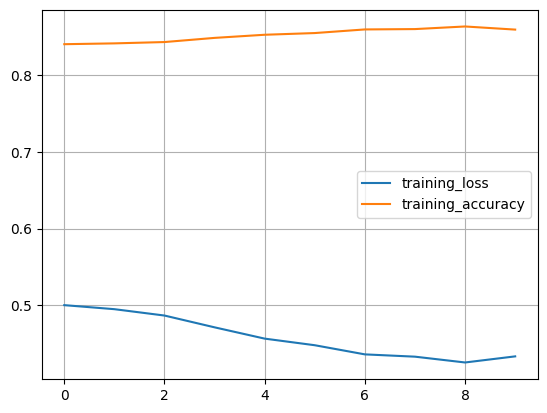

In [ ]:
#Original Output
plt.plot(results.history['loss'], label = 'training_loss')
plt.plot(results.history['accuracy'], label = 'training_accuracy')
plt.legend()
plt.grid(True)

In [ ]:
#Original output
color_to_class_mapping = {
    (0, 0, 0): 0,
    (0, 0, 142): 1,
    (70, 70, 70): 2,
    (70, 130, 180): 3,
    (107, 142, 35): 4,
    (119, 11, 32): 5,
    (128, 64, 128): 6,
    (152, 251, 152): 7,
    (153, 153, 153): 8,
    (220, 20, 60): 9,
    (220, 220, 0): 10,
    (244, 35, 232): 11,
    (255, 0, 0): 12
}
class_to_color_mapping = {v: k for k, v in color_to_class_mapping.items()}
def class_index_to_rgb(class_indexed_mask, class_to_color_mapping):
    if class_indexed_mask.ndim != 2:
        raise ValueError("Expected 2D array for class_indexed_mask, but got shape {}".format(class_indexed_mask.shape))
    height, width = class_indexed_mask.shape
    rgb_mask = np.zeros((height, width, 3), dtype=np.uint8)
    for class_idx, rgb_color in class_to_color_mapping.items():
        rgb_mask[class_indexed_mask == class_idx] = rgb_color

    return rgb_mask
model = tf.keras.models.load_model(dir +'/Semantic_segmentation_model.keras')


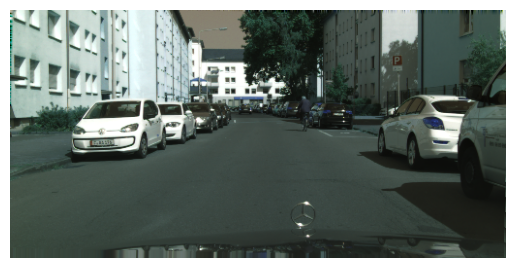

In [ ]:
im = cv2.imread(dir_2 + '/frankfurt_000000_000576_leftImg8bit.png')
im = resize_image(im, (512, 256))
plt.imshow(im)
plt.axis('off')
plt.show()

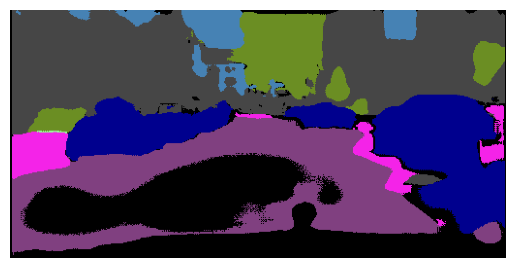

In [ ]:
#Original OUTPUT
plt.imshow(class_index_to_rgb(output_int[0], class_to_color_mapping))
plt.axis('off')
plt.show()

In [ ]:
len(class_index_to_rgb(output_int[0], class_to_color_mapping))

256

In [ ]:
import cv2
import numpy as np


image_path = '/content/gdrive/MyDrive/Dataset numpy array(converted)/ frankfurt_000000_003025_leftImg8bit.png'


image = cv2.imread(image_path)


if image is None:
    print(f"Error: Could not read image from path: {image_path}")
else:
    resized_image = resize_image(image, (512, 256))
    normalized_image = normalize_image(resized_image)


    output1 = model.predict(np.array([normalized_image]))
    output1_int = np.argmax(output1, axis=-1)



Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 274ms/step


In [ ]:
print(len(class_index_to_rgb(output1_int[0], class_to_color_mapping)))

256


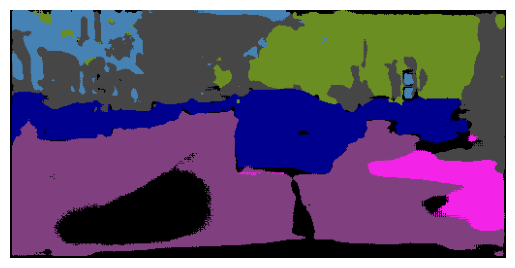

In [ ]:
plt.imshow(class_index_to_rgb(output1_int[0], class_to_color_mapping))
plt.axis('off')
plt.show()

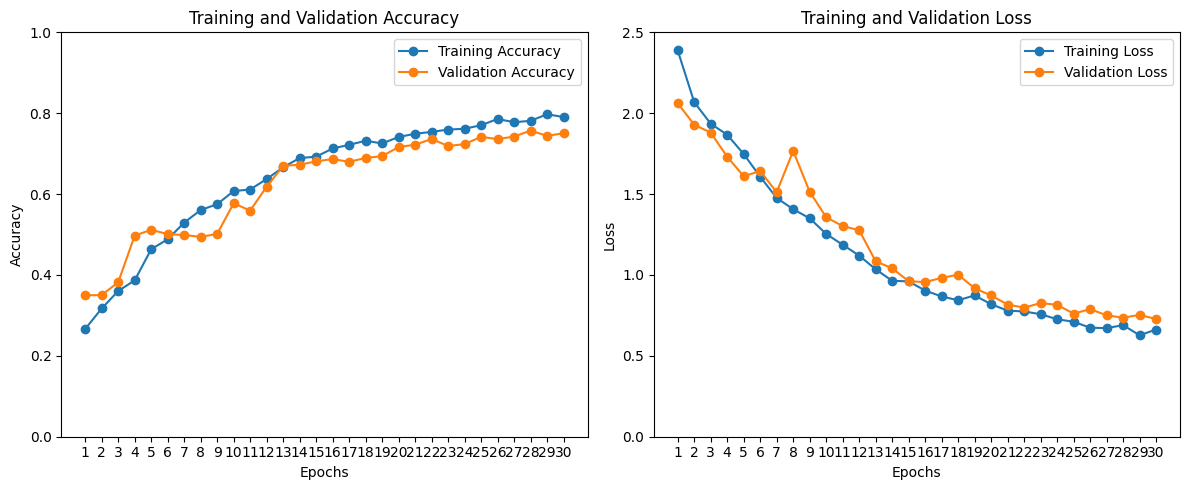

In [ ]:
import matplotlib.pyplot as plt

# Epochs from 1 to 30
epochs = range(1, 31)

# Training and validation accuracies
train_accuracy = [0.2665, 0.3171, 0.3603, 0.3866, 0.4635,
                  0.4883, 0.5295, 0.5606, 0.5750, 0.6075,
                  0.6113, 0.6372, 0.6663, 0.6891, 0.6925,
                  0.7128, 0.7218, 0.7319, 0.7252, 0.7412,
                  0.7492, 0.7538, 0.7595, 0.7616, 0.7703,
                  0.7858, 0.7777, 0.7812, 0.7974, 0.7905]

val_accuracy = [0.3498, 0.3503, 0.3819, 0.4972, 0.5118,
                0.5010, 0.4988, 0.4942, 0.5015, 0.5772,
                0.5592, 0.6182, 0.6698, 0.6726, 0.6809,
                0.6867, 0.6797, 0.6895, 0.6939, 0.7163,
                0.7221, 0.7362, 0.7189, 0.7236, 0.7415,
                0.7359, 0.7423, 0.7570, 0.7440, 0.7504]

# Training and validation losses
train_loss = [2.3884, 2.0686, 1.9352, 1.8666, 1.7479,
              1.6075, 1.4763, 1.4063, 1.3504, 1.2537,
              1.1869, 1.1199, 1.0351, 0.9640, 0.9604,
              0.9038, 0.8671, 0.8437, 0.8734, 0.8192,
              0.7795, 0.7744, 0.7574, 0.7263, 0.7106,
              0.6741, 0.6713, 0.6897, 0.6274, 0.6626]

val_loss = [2.0618, 1.9290, 1.8802, 1.7309, 1.6108,
            1.6423, 1.5115, 1.7668, 1.5148, 1.3570,
            1.3022, 1.2768, 1.0848, 1.0412, 0.9615,
            0.9560, 0.9820, 1.0018, 0.9177, 0.8733,
            0.8171, 0.7981, 0.8263, 0.8155, 0.7612,
            0.7886, 0.7509, 0.7355, 0.7535, 0.7276]

# Plotting Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.ylim(0, 1)  # Set y-axis limits to show accuracy scale
plt.legend()

# Plotting Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(epochs)
plt.ylim(0, 2.5)  # Set y-axis limits to show loss scale
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt


def process_video(video_path, output_path, model, resize_dims=(512, 256)):
    """Processes a video frame-by-frame using a pre-trained model.

    Args:
        video_path: Path to the input video file.
        output_path: Path to save the output video file.
        model: The pre-trained Keras model for semantic segmentation.
        resize_dims: Tuple defining the target size for frame resizing.
    """


    cap = cv2.VideoCapture('/content/gdrive/MyDrive/Dataset numpy array(converted)/output_video2.mp4')
    if not cap.isOpened():
        print("Error: Could not open video file.")
        return

    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))


    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

    while True:

        ret, frame = cap.read()
        if not ret:
            break


        resized_frame = resize_image(frame, resize_dims)
        normalized_frame = normalize_image(resized_frame)


        prediction = model.predict(np.expand_dims(normalized_frame, axis=0))


        segmented_frame = class_index_to_rgb(np.argmax(prediction[0], axis=-1), class_to_color_mapping)


        segmented_frame = cv2.resize(segmented_frame, (frame_width, frame_height), interpolation=cv2.INTER_NEAREST)


        out.write(segmented_frame)


    cap.release()
    out.release()
    cv2.destroyAllWindows()

    print(f"Output video saved to: {output_path}")


video_path = '/content/gdrive/MyDrive/Dataset numpy array(converted)/my_video.mp4'  # Update with your video path
output_path = '/content/gdrive/MyDrive/Dataset numpy array(converted)/output_video.avi'  # Change output path if needed


process_video(video_path, output_path, model)


1/1 [==============================] - 0s 67ms/step
Output video saved to: /content/gdrive/MyDrive/Dataset numpy array(converted)/output_video.avi
